## 导入数据

In [196]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
df = pd.DataFrame(iris.data,  columns=iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
# df.loc[df['sepal length'] == 5.7]
df

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [132]:
df.shape

(150, 5)

In [133]:
df.label.value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

## 绘制分布
### 1 绘制萼片的分布规律，x轴为萼片长度，y为萼片宽度

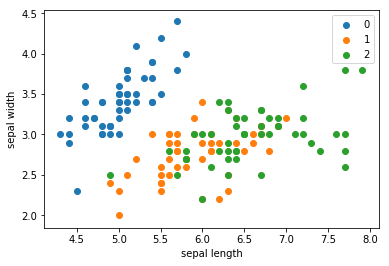

In [134]:
import  matplotlib.pyplot as plt
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.scatter(df[100:]['sepal length'], df[100:]['sepal width'], label='2')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

### 2 绘制花瓣的分布规律，x轴为花瓣长度，y为花瓣宽度

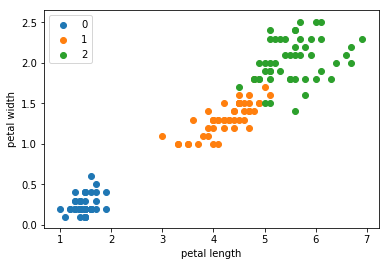

In [135]:
plt.scatter(df[:50]['petal length'], df[:50]['petal width'], label='0')
plt.scatter(df[50:100]['petal length'], df[50:100]['petal width'], label='1')
plt.scatter(df[100:]['petal length'], df[100:]['petal width'], label='2')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()

### 划分训练集，测试集

In [200]:
def shuffle_data(X, y, seed = None):
    if seed:
        np.random.seed(seed)
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)

    return X[idx], y[idx]

def train_test_split(X, y, test_size = 0.2, shuffle = True, seed = None):
    if shuffle:
        X, y = shuffle_data(X, y, seed)
    n_train_numbers = int(X.shape[0] * (1 - test_size))
    X_train, X_test = X[:n_train_numbers], X[n_train_numbers:]
    y_train, y_test = y[:n_train_numbers], y[n_train_numbers:]
    
    return X_train, X_test, y_train, y_test

In [201]:
import numpy as np

data = np.array(df)
X, y = data[:, :-1], data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [202]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [203]:
from collections import Counter

class KNN():
    def __init__(self, X_train, y_train, k = 5):
        self.k = k
        self.X_train = X_train
        self.y_train = y_train
    
    # 欧式距离
    def o_distance(self, one_sample):
        distances = np.power(np.tile(one_sample, (self.X_train.shape[0], 1)) - self.X_train, 2).sum(axis = 1)

        return distances
    
    # 预测样本的标签值
    def predict(self, one_sample):
        distances = self.o_distance(one_sample)
        distances = distances.tolist()
        
        knn_list = []
        for i in range(self.k):
            min_index = distances.index(min(distances))
            knn_list.append(self.y_train[min_index])
            distances[min_index] = 99999

        final_label, final_count = 0, 0
        for label, count in Counter(knn_list).items():
            if count>final_count:
                final_label = label
                final_count = count
        
        return final_label
    
    # 计算测试集中分类正确的个数
    def score(self, X_test, y_test):
        right_count = 0
        for X, y in zip(X_test, y_test):
            label = self.predict(X)
            if label == y:
                right_count+=1
        return right_count / len(X_test)

In [206]:
clf = KNN(X_train, y_train)
clf.score(X_test, y_test)

1.0

## 用sklearn来解决

In [207]:
from sklearn.neighbors import KNeighborsClassifier

clf_sk = KNeighborsClassifier()
clf_sk.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

- n_neighbors: 临近点个数
- p: 距离度量,p = 1时为manhattan_distance，p=2时为euclidean_distance
- algorithm: 近邻算法，可选{'auto', 'ball_tree', 'kd_tree', 'brute'}
- weights: 确定近邻的权重

In [208]:
clf_sk.score(X_test, y_test)

1.0